In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)

%matplotlib inline


In [6]:
# Load the CSV file instead of Excel
df = pd.read_csv('full_data.csv')  
df.head()



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
df.info()
df.describe()
df.isnull().sum()
df['stroke'].value_counts()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


stroke
0    4733
1     248
Name: count, dtype: int64

In [8]:
# Drop rows with missing values (or you could fill them using df.fillna())
df = df.dropna()

# One-hot encode categorical variables (like gender, work_type, etc.)
df = pd.get_dummies(df, drop_first=True)

df.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,True,False,False,True,True,False,False
1,80.0,0,1,105.92,32.5,1,True,True,True,False,False,False,False,True,False
2,49.0,0,0,171.23,34.4,1,False,True,True,False,False,True,False,False,True
3,79.0,1,0,174.12,24.0,1,False,True,False,True,False,False,False,True,False
4,81.0,0,0,186.21,29.0,1,True,True,True,False,False,True,True,False,False


In [9]:
X = df.drop('stroke', axis=1)  # All columns except 'stroke'
y = df['stroke']               # Target column

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.7362086258776329
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84       943
           1       0.15      0.83      0.25        54

    accuracy                           0.74       997
   macro avg       0.57      0.78      0.55       997
weighted avg       0.94      0.74      0.81       997

Confusion Matrix:
 [[689 254]
 [  9  45]]

Decision Tree Results:
Accuracy: 0.917753259779338
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       943
           1       0.13      0.09      0.11        54

    accuracy                           0.92       997
   macro avg       0.54      0.53      0.53       997
weighted avg       0.90      0.92      0.91       997

Confusion Matrix:
 [[910  33]
 [ 49   5]]

Random Forest Results:
Accuracy: 0.9418254764292878
Classification Report:
               precision   

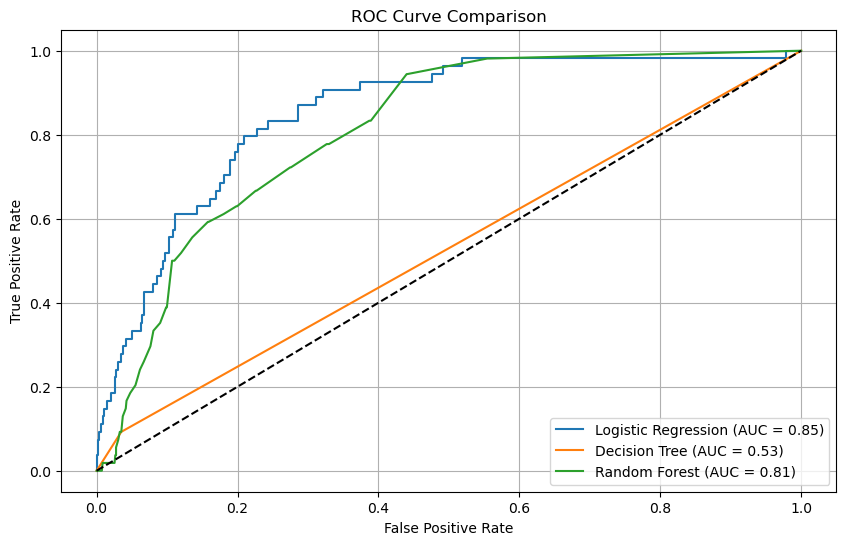

In [12]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal baseline
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


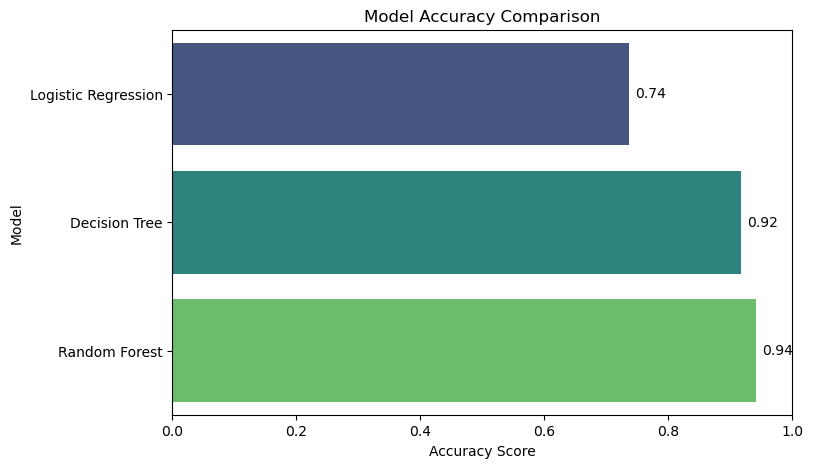

In [13]:
model_names = []
accuracies = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(acc)

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=accuracies, y=model_names, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.xlim(0, 1)

# Add value labels
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f"{acc:.2f}", va='center')

plt.show()
